In [3]:
import numpy as np
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset = dset.MNIST(root = './data/data_test',
                      train = True,
                      download = True,
                      transform = transform)
testset = dset.MNIST(root = './data/data_test',
                     train = True,
                     download = True,
                     transform = transform)
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          num_workers = 2)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = batch_size,
                                         shuffle = True,
                                         num_workers = 2)

* `Resize()` ：图片缩放
* `RandomCrop()` ：随机裁剪
* `Normalize()` ：标准化
* `ToTensor()` ：将 NumPy 图片转换为 Torch 图片
* `ToPILImage()` ：转换为 PIL 图片
* `RandomHorizontalFlip()` ：水平翻转
* `Compose()` ：组合多种方式

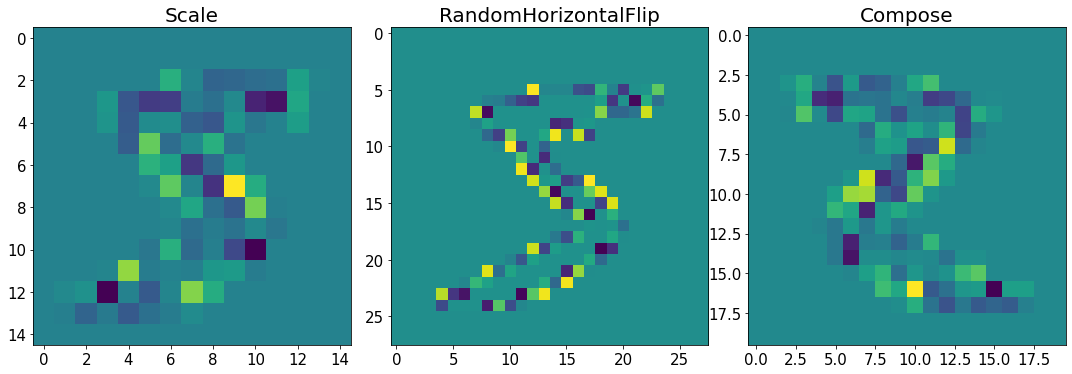

In [8]:
images = trainset.data
toPIL = transforms.ToPILImage()
toTensor = transforms.ToTensor()
scale = transforms.Scale(15)
hflip = transforms.RandomHorizontalFlip()
composed = transforms.Compose([transforms.Scale(20),hflip])
tsfms = [scale, hflip, composed]
fig = plt.figure(figsize=(15,15))
for i,tsfm in enumerate(tsfms):
    # 转换为 PIL.image ，数值范围由 [-1, 1] 转换为 [0, 1]
    # pil_sample = toPIL(images[0]/2 + 0.5)
    pil_sample = toPIL(torch.true_divide(images[0],2)+0.5)
    transformed_sample = toTensor(tsfm(pil_sample))
    final_sample = np.transpose(transformed_sample.numpy(),(1,2,0))
    ax = plt.subplot(1, 3, i+1)
    plt.imshow(final_sample)
    plt.tight_layout()
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    ax.set_title(type(tsfm).__name__, fontsize = 20)

特别注意：`Scale`、`RandomCrop`、`CenterCrop`、`RandomHorizontalFlip`、`RandomSizedCrop` 等类只能对 PIL 数据进行处理，否则，需要提前转换为 `PILImage(ToPILImage)` 。